# Tu primer árbol de decisión con scikit-learn

En este notebook vamos a ver cómo entrenar un árbol de decisión con scikit-learn. Vamos a usar el dataset de titani, que es un dataset muy conocido y que se usa mucho para hacer ejemplos de machine learning.
## Algunos Recursos

- [Documentación de scikit-learn](https://scikit-learn.org/stable/modules/tree.html#mathematical-formulation)
- [Plot  Tree](https://scikit-learn.org/stable/modules/tree.html#alternative-ways-to-export-trees)


## Resumen

1. Importar las librerías necesarias
2. Cargar el dataset
3. Preprocesar el dataset y EDA
4. Entrenar el modelo
5. Evaluar el modelo

## 1. Importar las librerías necesarias



In [21]:
#Importamos las librerias principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importamos las librerias de sklearn para el modelo clasificador
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# desbalanceo de clases
from imblearn.under_sampling import RandomUnderSampler

# grid search
from sklearn.model_selection import GridSearchCV

# warnings
import warnings
warnings.filterwarnings('ignore')


## Cargar el dataset

Utilizaremos el dataset Titanic de Standford: https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html

enlace directo al dataset: https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv 

- Variable	Definition	Key
- survival	Survival	0 = No, 1 = Yes
- pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
- sex	Sex	
- Age	Age in years	
- sibsp	# of siblings / spouses aboard the Titanic	
- parch	# of parents / children aboard the Titanic	
- ticket	Ticket number	
- fare	Passenger fare

In [2]:
#Cargamos dataset de titanic
df = pd.read_csv("https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv")
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


## Preprocesar el dataset y EDA

In [4]:
#Visualizacion del DataFrame
df.head(5)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [5]:
#Eliminamos las columnas que no nos interesan
columns_to_drop = ['Name']

df_limpio = df.drop(columns=columns_to_drop)



In [6]:
#Analizamos el shape del objeto
print(df_limpio.shape)

(887, 7)


In [7]:
#Visualizamos los tipos de datos
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Sex                      887 non-null    object 
 3   Age                      887 non-null    float64
 4   Siblings/Spouses Aboard  887 non-null    int64  
 5   Parents/Children Aboard  887 non-null    int64  
 6   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.6+ KB


el dataset esta limpio, sin valores faltante y listo para ser usado.

In [8]:
df_limpio.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [9]:
# renombramos la columna 'Pclass' a 'Clase' y "Sibling/Spouse Aboard" a "Familiares"
# la de "Parents/Children Aboard" a "PadresHijos"
df_limpio.rename(columns={'Pclass':'Clase', 
                          'Siblings/Spouses Aboard':'Familiares',
                            'Parents/Children Aboard':'PadresHijos'
                            }, inplace=True)

In [10]:
#Cambiamos los tipos de datos
titanic = pd.get_dummies(df_limpio
                         , columns = ["Sex"], drop_first = True)
titanic.dtypes

Survived         int64
Clase            int64
Age            float64
Familiares       int64
PadresHijos      int64
Fare           float64
Sex_male          bool
dtype: object

In [13]:
#cambiar "Sex_male" type columns a int

titanic['Sex_male']= titanic['Sex_male'].astype(int)

titanic.dtypes

Survived         int64
Clase            int64
Age            float64
Familiares       int64
PadresHijos      int64
Fare           float64
Sex_male         int32
dtype: object

In [14]:
titanic.rename(columns={'Sex_male':'Sex'}, inplace=True)

### Análisis Exploratorio de Datos (EDA)

In [15]:
titanic.describe()

,Survived,Clase,Age,Familiares,PadresHijos,Fare,Sex
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000,887.000000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542,0.645998
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204,0.478480
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420,1.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920,1.000000


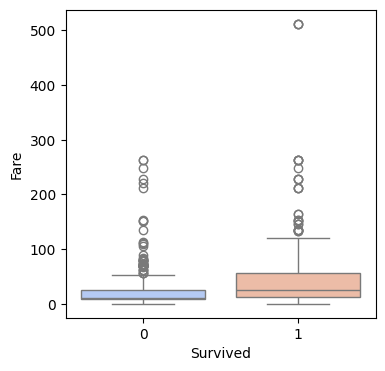

In [22]:
# visualizar Fare boxplot con seaborn by Survived
plt.figure(figsize=(4, 4))
sns.boxplot(x='Survived', y='Fare', data=titanic, palette='coolwarm')
plt.show()

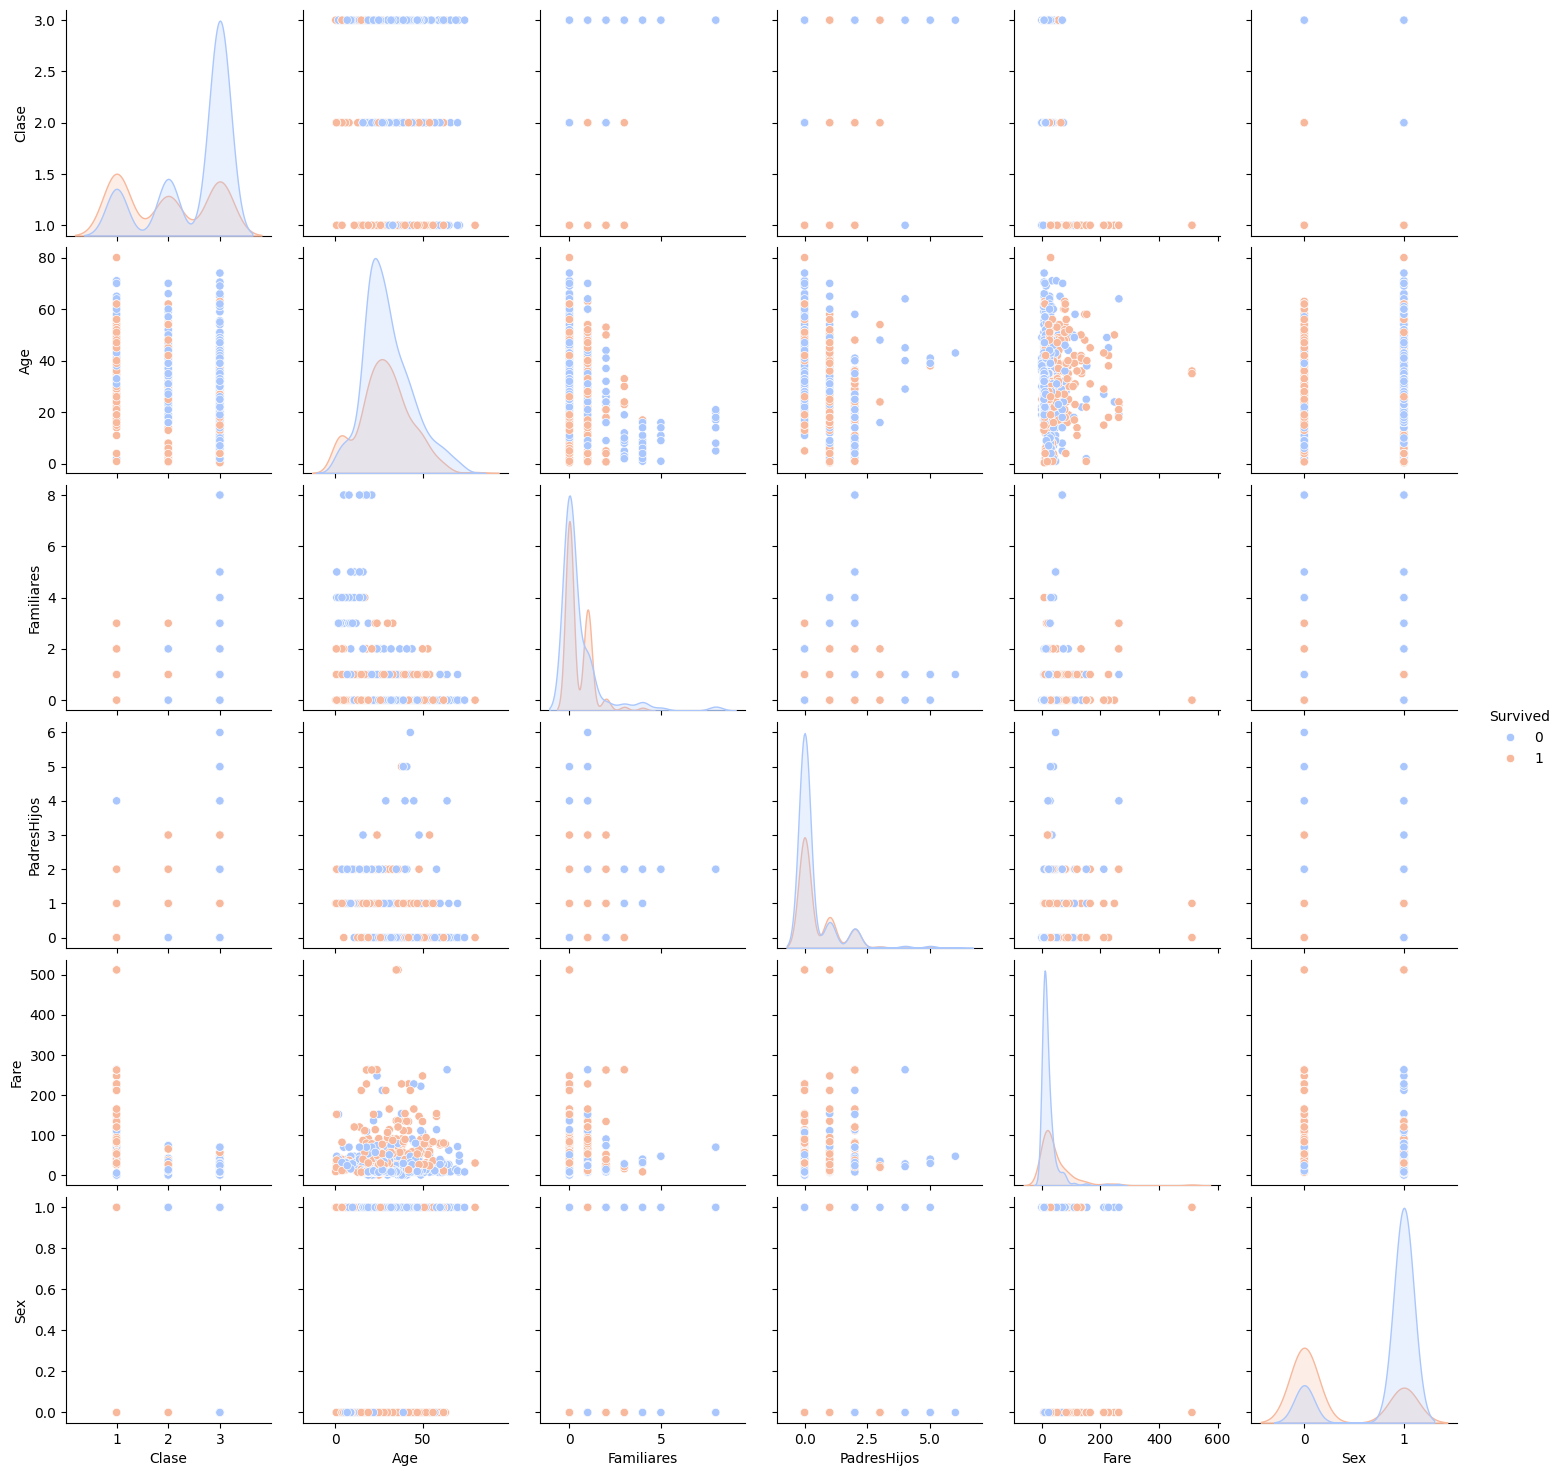

In [23]:
# pairplot de las variables numéricas
sns.pairplot(titanic, hue='Survived', palette='coolwarm')
plt.show()

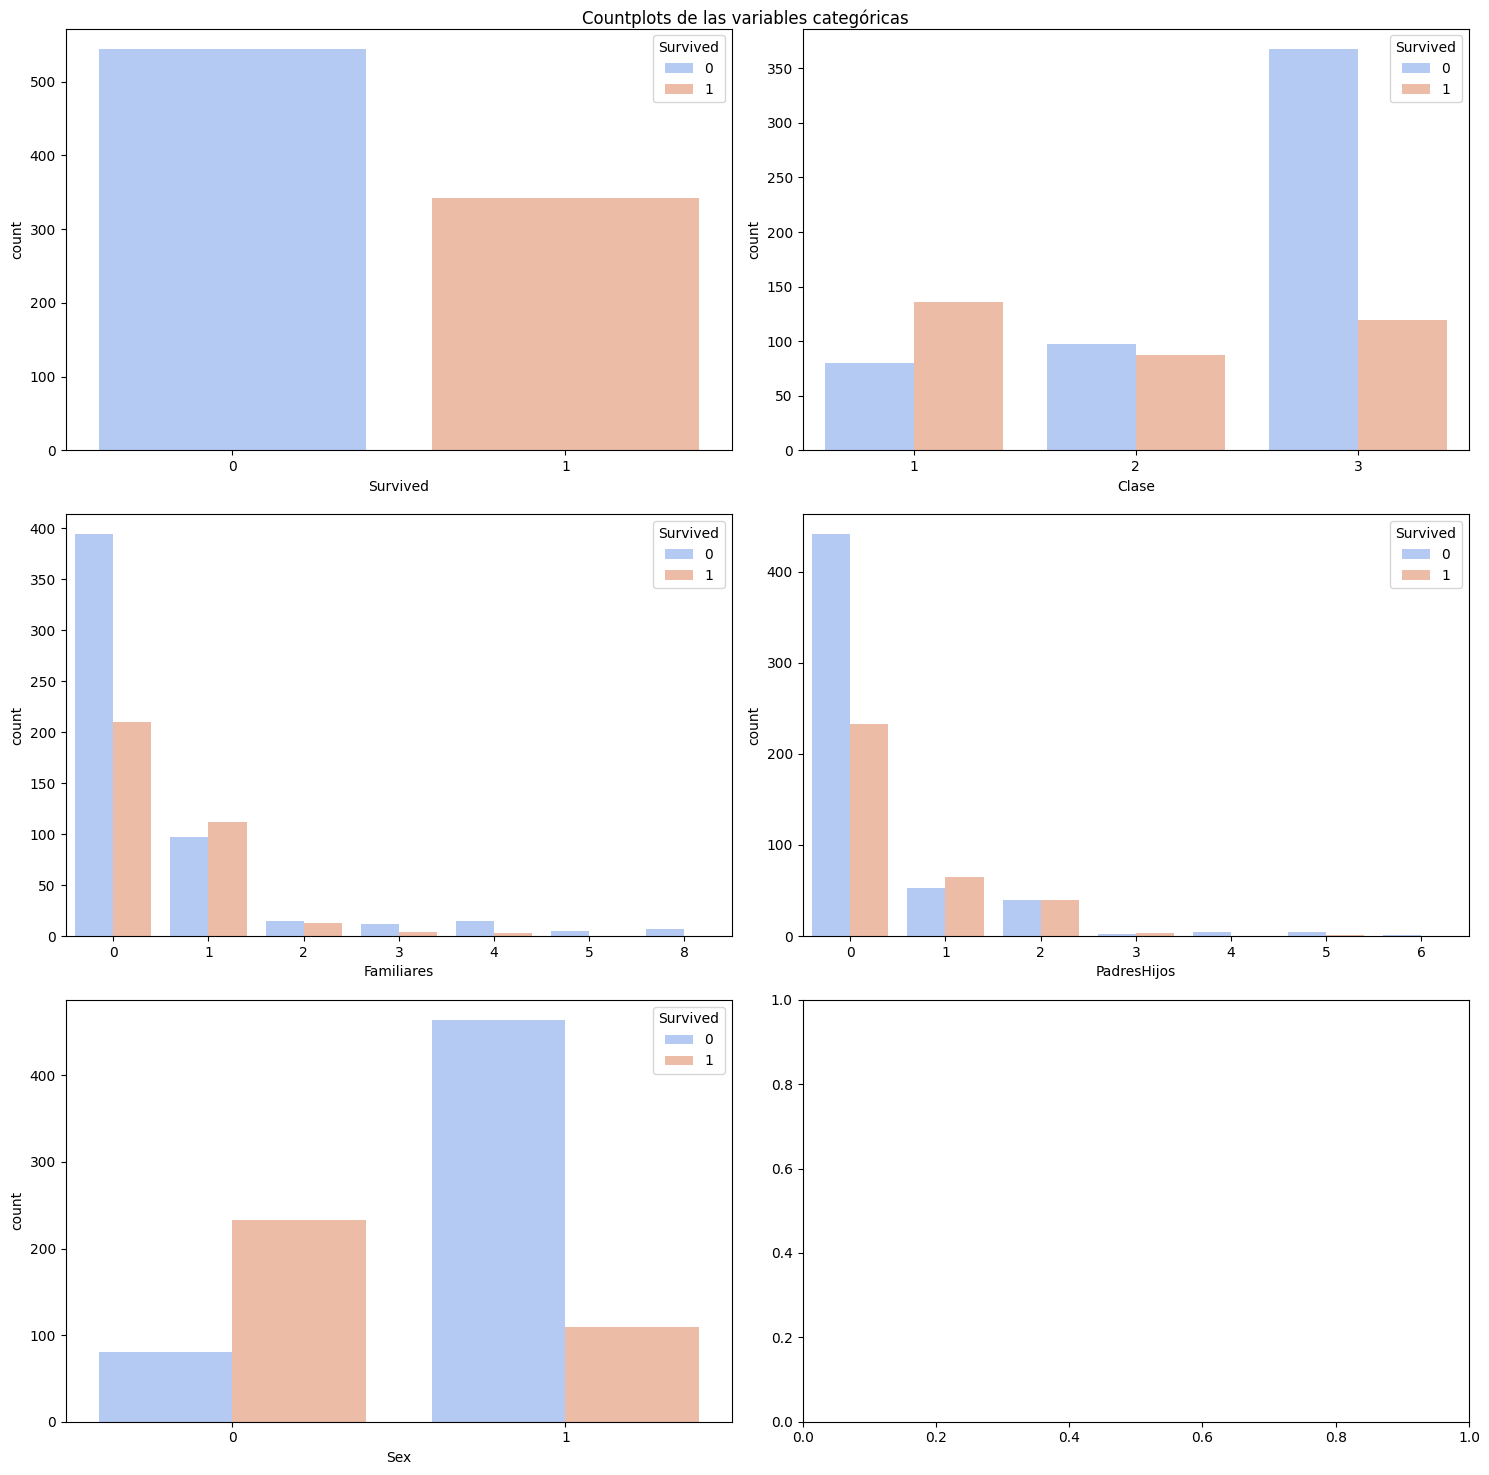

In [30]:
# hacer countplot de todas las variables menos 'Fare' con for y subplots seaborn, hue='Survived'
no_columns = ['Age', 'Fare']

fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Countplots de las variables categóricas')

for i, column in enumerate(titanic.columns):
    if column not in no_columns:
        sns.countplot(x=column, data=titanic, hue='Survived', ax=axes[i//3, i%3], palette='coolwarm')
    

plt.tight_layout()
plt.show()


Esta desbalanceado la variable objetivo, la variable objetivo es `survived` que indica si la persona sobrevivió o no. Se identificó una fuerte relación entre la variable `sex` y la variable objetivo `survived`. También se identificó una relación entre la variable `clase` y la variable objetivo `survived`.

## Entrenamiento de árbol de decisión con scikit-learn

In [31]:
# separar en X y y
X = titanic.drop(columns='Survived')
y = titanic['Survived']



In [33]:
# aplicar undersampling a las clases minoritarias
rus = RandomUnderSampler(random_state=23)
X_res, y_res = rus.fit_resample(X, y)

# separar en train y test
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=23)

In [47]:
X_res.columns

Index(['Clase', 'Age', 'Familiares', 'PadresHijos', 'Fare', 'Sex'], dtype='object')

In [34]:
#Arbol de Decision
#Creacion del modelo
tree = DecisionTreeClassifier(max_depth=3, random_state = 23)

#Entrenamiento del modelo
tree.fit(X_train, y_train)

#Prediccion
y_pred = tree.predict(X_test)
y_pred_train = tree.predict(X_train)



In [ ]:
# grid search

## Evaluación del modelo

In [35]:
# accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# accuracy train
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f'Accuracy Train: {accuracy_train:.2f}')

Accuracy: 0.82
Accuracy Train: 0.81


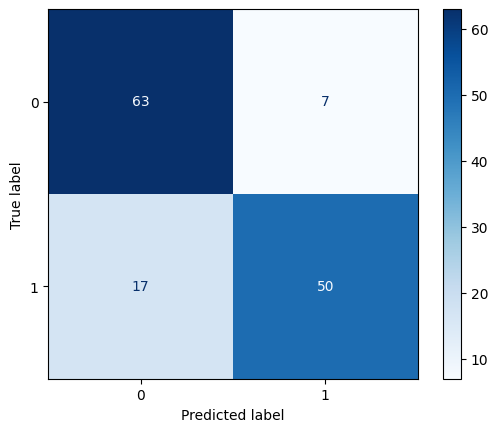

In [39]:
# confusion matrix and Display
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree.classes_).plot(cmap='Blues')

plt.show()

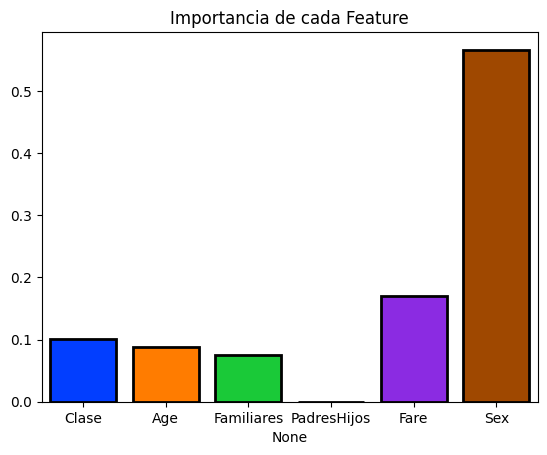

In [40]:
#Verificamos el feature importances
import seaborn as sns

importances = tree.feature_importances_
columns = X.columns
sns.barplot(x=columns,y=importances, palette = 'bright', saturation = 2.0, edgecolor = 'black', linewidth = 2)
plt.title('Importancia de cada Feature')
plt.show()

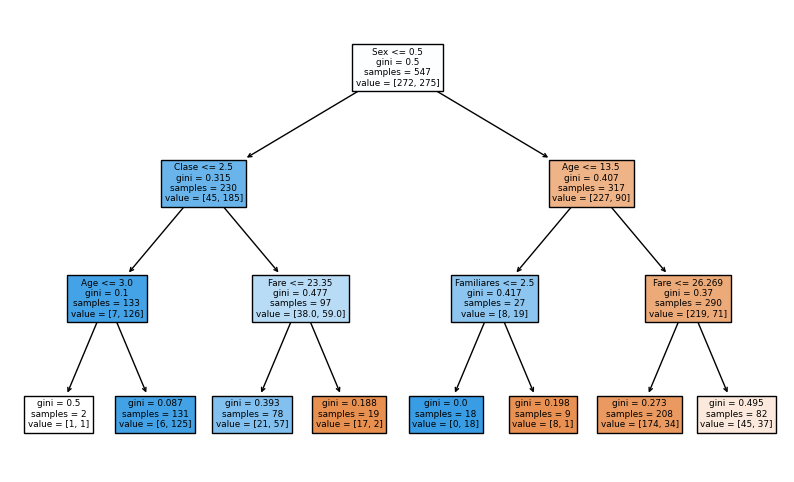

In [42]:
#Visualizamos el arbol
from sklearn.tree import plot_tree
# https://scikit-learn.org/stable/modules/tree.html#alternative-ways-to-export-trees
plt.figure(figsize=(10,6))
plot_tree(tree,feature_names=columns, filled=True)
plt.show()

In [43]:
# classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.79      0.90      0.84        70
           1       0.88      0.75      0.81        67

    accuracy                           0.82       137
   macro avg       0.83      0.82      0.82       137
weighted avg       0.83      0.82      0.82       137



## Hacer predicciones

In [52]:
# hacer predicciones con el modelo
nombre = 'Jack'
edad = 23
clase = 3
familiares = 0
padres_hijos = 0
tarifa = 5
sexo = 1
columns =['Clase', 'Age', 'Familiares', 'PadresHijos', 'Fare', 'Sex']

# crear un dataframe con los datos
data = [[clase, edad, familiares, padres_hijos, tarifa, sexo]]

df_pred = pd.DataFrame(data, columns=columns)


# hacer predicciones

pred = tree.predict(df_pred)
prob = tree.predict_proba(df_pred)

print(f'la prediccion para el pasajero es: {pred[0]}')
print(f'El pasajero {nombre} tiene una probabilidad de {prob[0][1]:.2f} de sobrevivir')

la prediccion para el pasajero es: 0
El pasajero Jack tiene una probabilidad de 0.16 de sobrevivir


## Random Forest

In [47]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100,max_depth=3, random_state=23)

rf_model.fit(X_train,y_train)

/tmp/ipykernel_443/228946322.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train,y_train)


RandomForestRegressor(max_depth=3, random_state=23)

In [48]:
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

In [49]:
#Calculo de metricas 
#mean_squared_error

#Calculo el error cuadratico medio en Train
train_metric = mean_squared_error(y_train,y_train_pred_rf)

#Calculo el error cuadratico medio en Test
test_metric = mean_squared_error(y_test,y_test_pred_rf)

print('El error cuadratico medio  en train es:', train_metric)
print('El error cuadratico medio  en test es:', test_metric)
train_metric

El error cuadratico medio  en train es: 0.009372214618274368
El error cuadratico medio  en test es: 0.00988698929371856


0.009372214618274368

In [50]:
error1 

0.010006356017203417

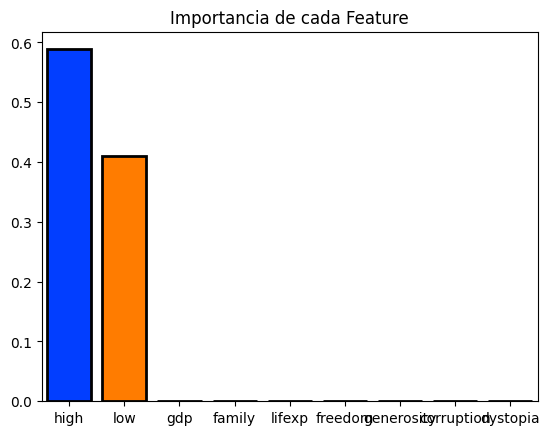

In [51]:
#Verificamos el feature importances
import seaborn as sns

importances = rf_model.feature_importances_
columns = X.columns
sns.barplot(x=columns,y=importances, palette = 'bright', saturation = 2.0, edgecolor = 'black', linewidth = 2)
plt.title('Importancia de cada Feature')
plt.show()

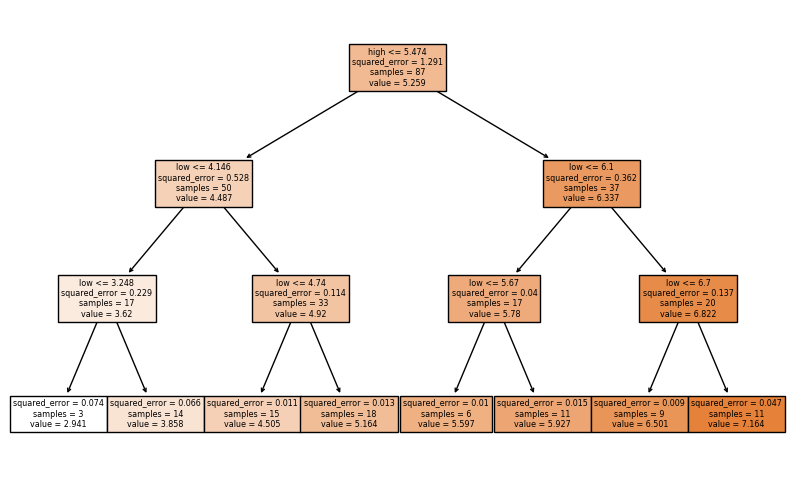

In [53]:
tree= rf_model.estimators_[99]
plt.figure(figsize=(10,6))
plot_tree(tree,feature_names=columns, filled=True)
plt.show()

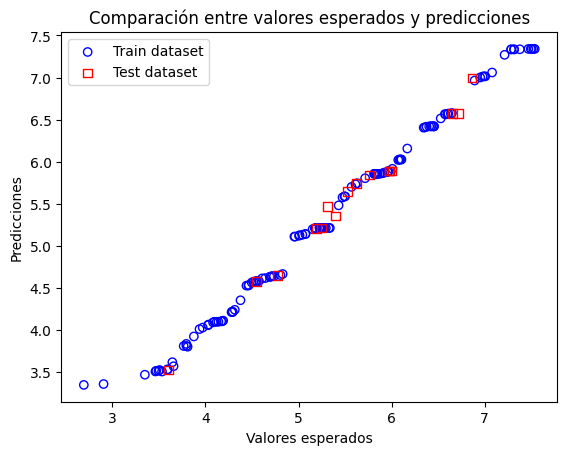

In [54]:
# Crear una figura y un conjunto de ejes
fig, ax = plt.subplots()

# Graficar las predicciones frente a los valores esperados
ax.scatter(y_train, y_train_pred_rf, color='blue',marker='o', facecolors='none', label="Train dataset")
plt.scatter(y_test,y_test_pred_rf,color='r',s=40,marker='s', facecolors='none', label="Test dataset")


# Etiquetas de los ejes
ax.set_xlabel('Valores esperados')
ax.set_ylabel('Predicciones')

# Título del gráfico
ax.set_title('Comparación entre valores esperados y predicciones')

# Leyenda
ax.legend()

# Mostrar el gráfico
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3e4be8b6-6c74-4684-9aa7-992eab9b3282' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>